# Gen 1 Pokemon Image Classifier!!!
This project is a simple image classifier for all 151 first generation Pokemon. 
The dataset comes from Kaggle: https://www.kaggle.com/datasets/rogerkoala/first-gen-pokemon 

## Cell Breakdown:
1. Imports.
2. Load training and validation datasets.
3. Store category names and number of categories.
4. Display test images to confirm propper import.
5. Run autotune.
6. Define the custom model shape.
7. Fit the model.
8. Show model training history.
9. Test with image of choice. 

## Helpful links:
- Loading and processing: https://www.tensorflow.org/tutorials/load_data/images
- Data augmentation: https://www.tensorflow.org/tutorials/images/data_augmentation

In [1]:
#imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
#load data for training and testing
train_ds = image_dataset_from_directory(
    '../First-Gen_Pokemon_Image_Classifier/dataset/train',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(128, 128),
)

val_ds = image_dataset_from_directory(
    '../First-Gen_Pokemon_Image_Classifier/dataset/test',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128, 128),
)

Found 2249 files belonging to 151 classes.
Using 1800 files for training.
Found 852 files belonging to 151 classes.
Using 170 files for validation.


In [3]:
#store and show class names
class_names = train_ds.class_names
num_classes = len(class_names)
print("Number of classes:", num_classes)
print("Class names:", class_names)

Number of classes: 151
Class names: ['Abra', 'Aerodactyl', 'Alakazam', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetch', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'Mr-Mime', 'Muk',

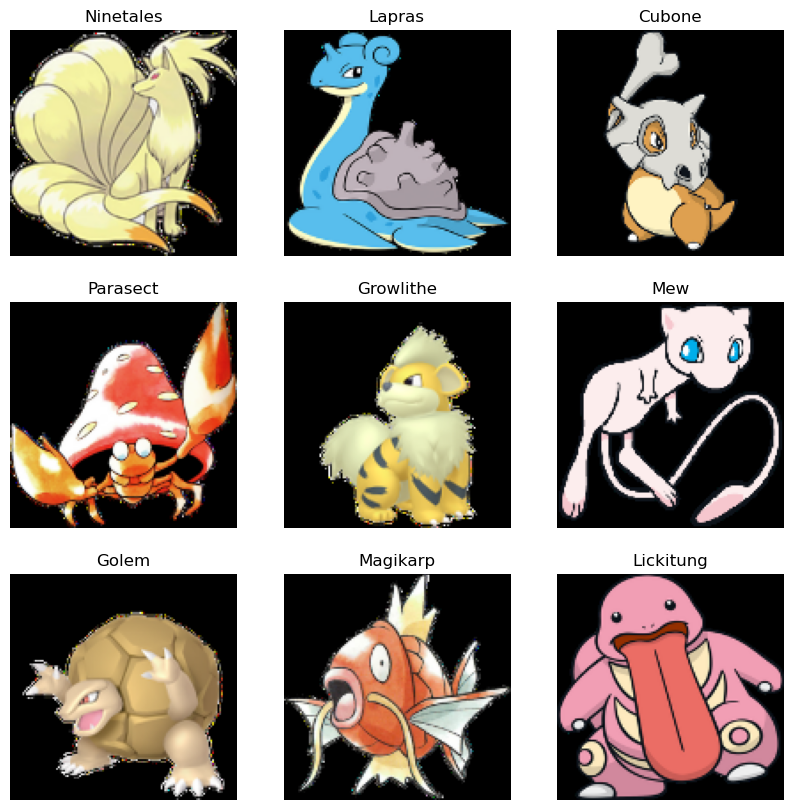

In [4]:
#draw some of the pokemon to ensure that everything loaded right
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(128, 128),
  layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

<Figure size 1000x1000 with 0 Axes>

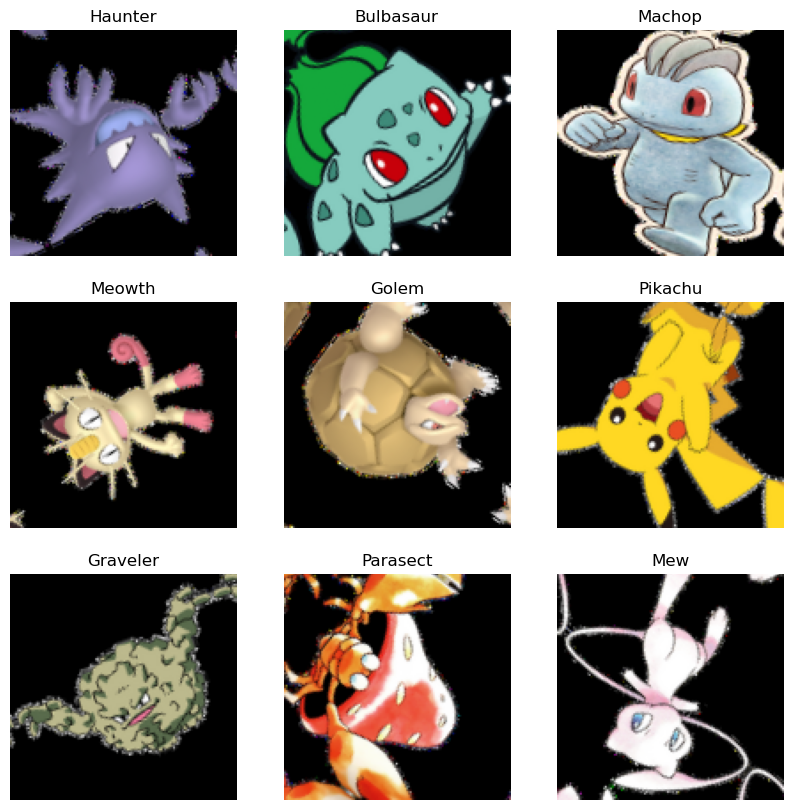

In [16]:
plt.figure(figsize=(10, 10))

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(data_augmentation(resize_and_rescale(images[i].numpy().astype("uint8"))))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

from tensorflow import keras
from tensorflow.keras import layers
from keras.applications.inception_v3 import InceptionV3


pretrained_base = keras.applications.InceptionV3(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    name="inception_v3",
)

pretrained_base.trainable = False

In [14]:
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
  resize_and_rescale,
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3,
    verbose=1,
)

print("Model finished.")

Epoch 1/3
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.0228 - loss: 4.9678 - val_accuracy: 0.0529 - val_loss: 4.7034
Epoch 2/3
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.2061 - loss: 3.7866 - val_accuracy: 0.3706 - val_loss: 2.9550
Epoch 3/3
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.6233 - loss: 1.6138 - val_accuracy: 0.4824 - val_loss: 2.3852
Model finished.


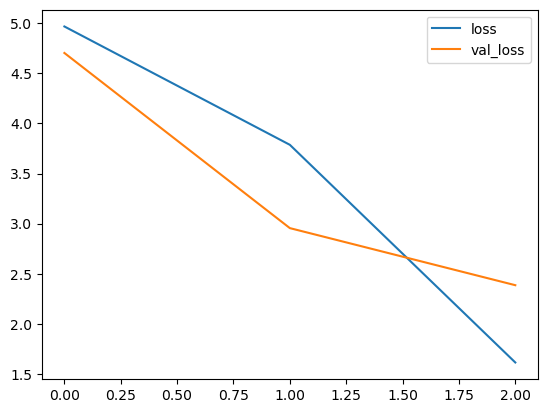

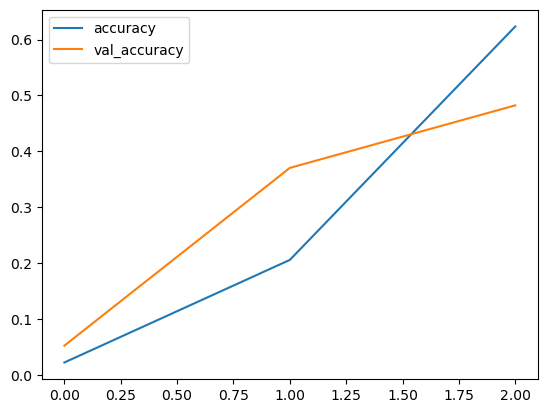

In [8]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [9]:
from tensorflow.keras.preprocessing import image
import numpy as np


def processImage(path, target_size = (128, 128)):
    img = image.load_img(path, target_size = target_size)
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis = 0)
    return img_batch

test_image = '../First-Gen_Pokemon_Image_Classifier/dataset/test/Abra/abra.png'
processed_image = processImage(test_image, (128, 128))
prediction = model.predict(processed_image)
print("Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Prediction: [[  6.0207386  -10.248408     4.5505066   -6.3574686   -0.28656906
  -12.911644    -4.723638     0.57880265 -13.787388   -15.922603
  -21.08577     -2.2439806  -14.411861     1.7054658    7.429336
    2.6842597  -17.75192     -5.9371014  -15.773905    -1.7594585
   -1.5396639   -3.697932   -20.287264    -8.495537     0.08864744
   -5.7136183    5.9149017   -8.89784     -1.9846033   -4.1082625
   -0.75986654  -3.223775     8.366849    -9.680698    -2.9664574
   -3.3581188   -6.433622    -3.5712402    0.90445864 -10.597474
  -12.478336    -9.153808    -4.901038   -11.20832     -7.813281
   -8.385784    -3.697638    -8.274489   -12.378255     1.3240722
   -1.5037117   -7.7949133   -3.1767619   -6.516427    -7.422436
   -2.1408935  -18.076368    -7.4680033    1.6987405   -0.71302533
    3.7646832   -0.76889235   0.6047031    0.5744514    0.97729695
   -0.33083352  -5.4902954    8.112337   -10.821978     1.6013775
   -6.333204   -16.585436 